<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/September_9th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1
##1. What is an image?
##2. Gaussian distribution
##3. Play with 1D Gaussian
##4. 2D Gaussian kernal and blurring
##5. FFT and IFFT

In [1]:
!pip install hyperspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.2/976.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.3 MB/s eta 0:00:00


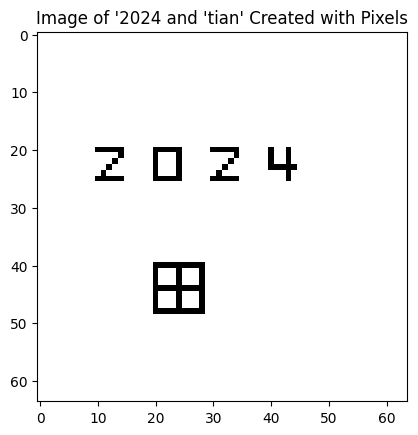

In [2]:
import numpy as np
import matplotlib.pyplot as plt

image_size = (64, 64)
img_array = np.ones(image_size) * 255  # Create a white background

# Function to set pixels for a number
def draw_number(img, number_array, top_left):
    for i, row in enumerate(number_array):
        for j, pixel in enumerate(row):
            if pixel == 1:
                img[top_left[0] + i, top_left[1] + j] = 0


number_2 = np.array([[1, 1, 1, 1, 1],
           [0, 0, 0, 0, 1],
           [0, 0, 0, 1, 0],
           [0, 0, 1, 0, 0],
           [0, 1, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0]])

number_0 = np.array([[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0]])

number_4 = np.array([[1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 1, 1, 1, 1],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0]])
letter_tian = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1]])


draw_number(img_array, number_2, (20, 10))
draw_number(img_array, number_0, (20, 20))
draw_number(img_array, number_2, (20, 30))
draw_number(img_array, number_4, (20, 40))
draw_number(img_array, letter_tian, (40, 20))

# Display the image
plt.imshow(img_array, cmap='gray')
plt.title("Image of '2024 and 'tian' Created with Pixels")
plt.show()


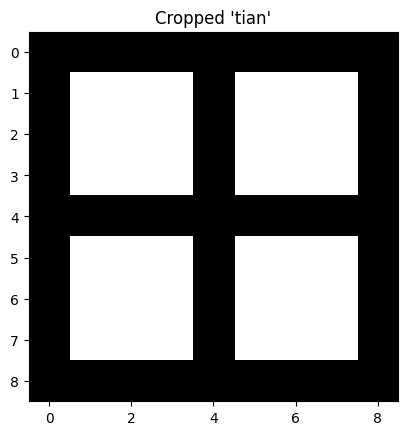

In [3]:
cropped_tian = img_array[40:49, 20:29]  # Adjust the cropping region as needed

# Display the cropped "田"
plt.imshow(cropped_tian, cmap='gray')
plt.title("Cropped 'tian'")
plt.show()

# 1D Gaussian
$$
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
$$

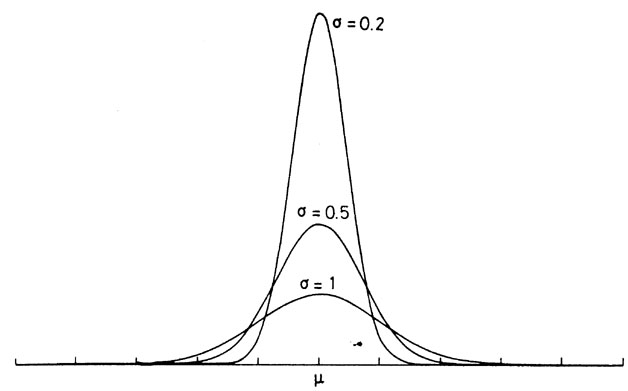

In [4]:
from IPython.display import display, Math

gaussian_eq = r'''
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
'''
display(Math(gaussian_eq))
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def gaussian(x, height, mu, sigma):
    return height * np.exp(-((x - mu)**2) / (2 * sigma**2))

def update_plot(height, mu, sigma):
    x = np.linspace(-10, 10, 400)
    y = gaussian(x, height, mu, sigma)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f"Gaussian Curve: $\mu={mu}, \sigma={sigma}, a={height}$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

# Create interactive widgets for height, mean (mu), and sigma
height_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Height (a)')
mu_slider = widgets.FloatSlider(value=0, min=-5, max=6, step=0.1, description='Mean (μ)')
sigma_slider = widgets.FloatSlider(value=1, min=0.1, max=7, step=0.1, description='Sigma (σ)')

# Display the widgets and the plot
ui = widgets.VBox([height_slider, mu_slider, sigma_slider])
out = widgets.interactive_output(update_plot, {'height': height_slider, 'mu': mu_slider, 'sigma': sigma_slider})

display(ui, out)


<IPython.core.display.Math object>

Output()

# 3D Gaussian
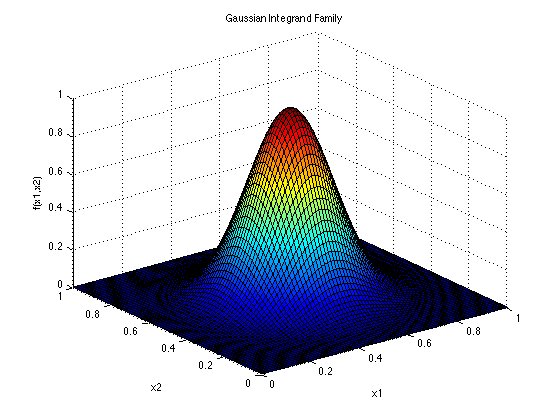

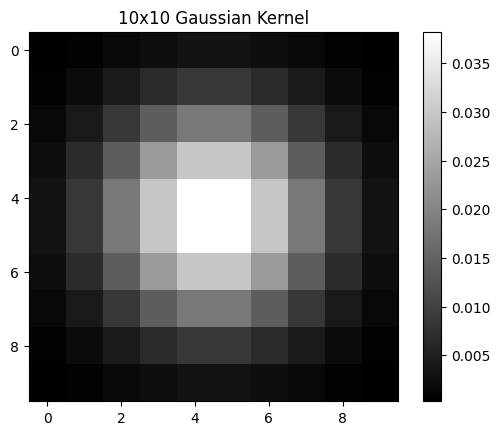

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)


gaussian_kernel_10 = gaussian_kernel(10, sigma=2)


plt.imshow(gaussian_kernel_10, cmap='gray')
plt.title("10x10 Gaussian Kernel")
plt.colorbar()
plt.show()


# Electron prob is just like a 3D-gaussian peak
1. FIB: 10-100nm probel size
2. SEM: 1-10nm probe size
3. AC corrected STEM 0.04-0.1nm probe size
4. Diameter of atom: 0.1-0.5nm
5. Length of DNA ~30nm
6. Length of Covid-19: 100nm
7. Length of human hair: 10,000-200,000nm


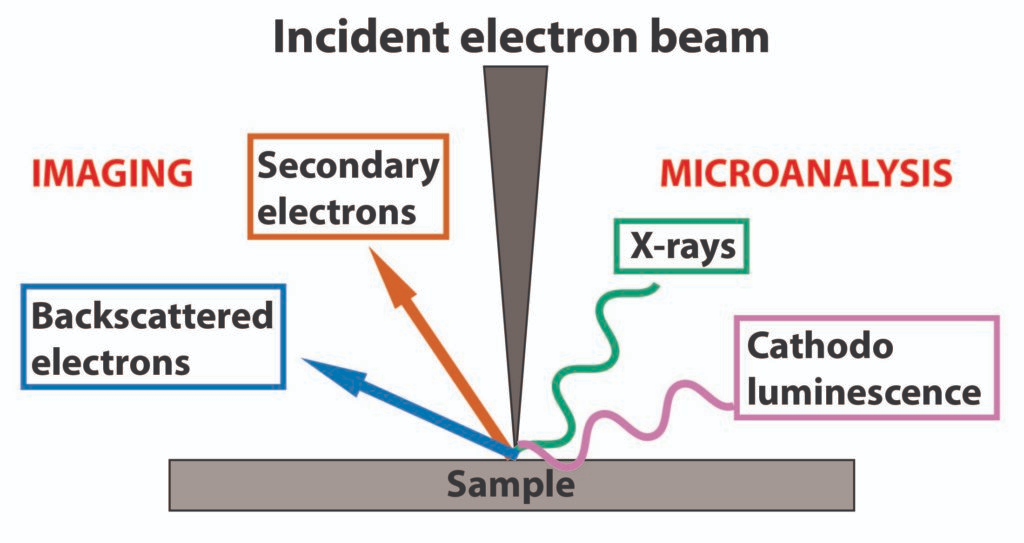

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

def update_plot(size, sigma):
    kernel = gaussian_kernel(size, sigma)
    plt.figure(figsize=(6, 6))
    plt.imshow(kernel, cmap='gray')
    plt.title(f"{size}x{size} Gaussian Kernel (σ={sigma})")
    plt.colorbar()
    plt.show()

size_slider = widgets.IntSlider(value=50, min=1, max=100, step=1, description='Pixel Size:')
sigma_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Sigma:')

ui = widgets.VBox([size_slider, sigma_slider])
out = widgets.interactive_output(update_plot, {'size': size_slider, 'sigma': sigma_slider})

display(ui, out)


Output()

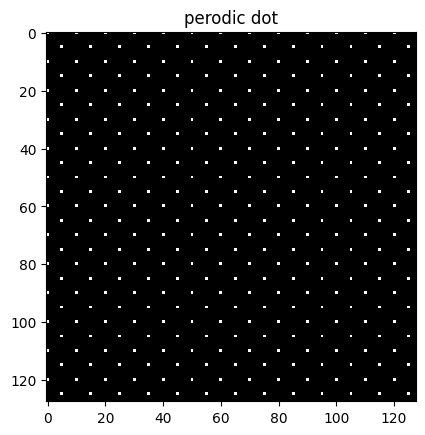

In [7]:
def generate_fcc_image(size=128, separation=10):
    """Generate a 2D image of FCC phase atoms with single pixel dots"""
    image = np.zeros((size, size))

    # FCC structure - Atoms at corners and center of faces in 2D projection
    for x in range(0, size, separation):
        for y in range(0, size, separation):
            # Add atom at corner (single pixel dot)
            image[x, y] = 1
            # Add atom at the center of the 'face' (single pixel dot)
            if x + separation // 2 < size and y + separation // 2 < size:
                image[x + separation // 2, y + separation // 2] = 1

    return image

# Generate the image
fcc_image = generate_fcc_image(size=128, separation=10)

# Plot the image
plt.imshow(fcc_image, cmap='gray', interpolation='none')
plt.title("perodic dot")
plt.show()


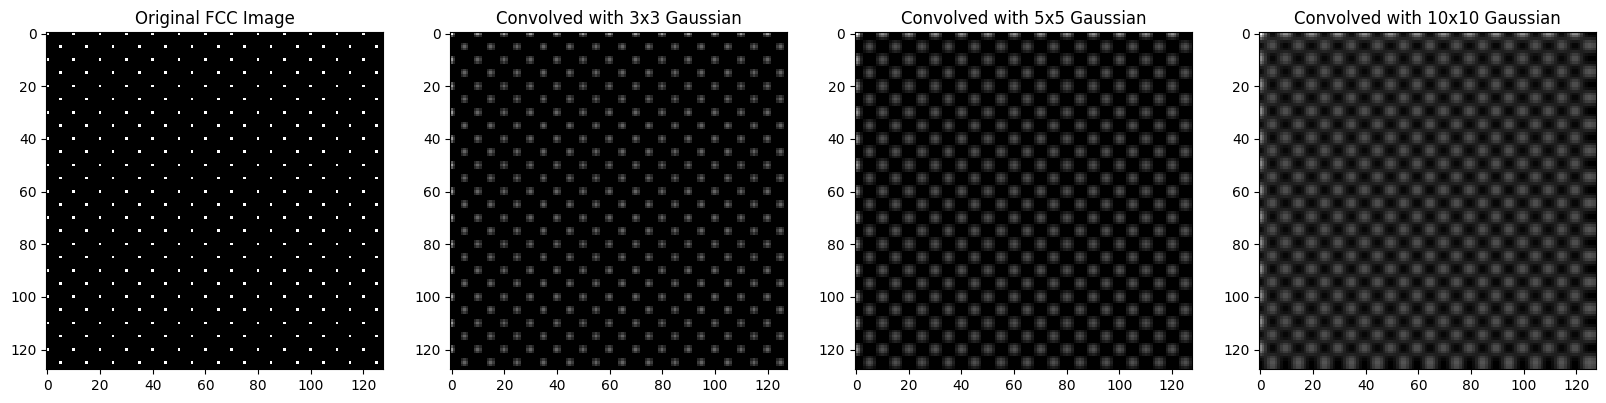

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

def generate_fcc_image(size=128, separation=10):
    """Generate a 2D image of FCC phase atoms with single pixel dots"""
    image = np.zeros((size, size))

    # FCC structure - Atoms at corners and center of faces in 2D projection
    for x in range(0, size, separation):
        for y in range(0, size, separation):
            # Add atom at corner (single pixel dot)
            image[x, y] = 1
            # Add atom at the center of the 'face' (single pixel dot)
            if x + separation // 2 < size and y + separation // 2 < size:
                image[x + separation // 2, y + separation // 2] = 1

    return image

# Generate the FCC image
fcc_image = generate_fcc_image(size=128, separation=10)

# Create Gaussian kernels with varying sizes
gaussian_3x3 = gaussian_kernel(3, sigma=1)
gaussian_5x5 = gaussian_kernel(5, sigma=1.5)
gaussian_10x10 = gaussian_kernel(10, sigma=2)

# Convolve the FCC image with each Gaussian kernel
convolved_3x3 = convolve(fcc_image, gaussian_3x3)
convolved_5x5 = convolve(fcc_image, gaussian_5x5)
convolved_10x10 = convolve(fcc_image, gaussian_10x10)

# Plot the original FCC image and convolved results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(fcc_image, cmap='gray', interpolation='none')
ax[0].set_title('Original FCC Image')

ax[1].imshow(convolved_3x3, cmap='gray', interpolation='none')
ax[1].set_title('Convolved with 3x3 Gaussian')

ax[2].imshow(convolved_5x5, cmap='gray', interpolation='none')
ax[2].set_title('Convolved with 5x5 Gaussian')

ax[3].imshow(convolved_10x10, cmap='gray', interpolation='none')
ax[3].set_title('Convolved with 10x10 Gaussian')

plt.show()


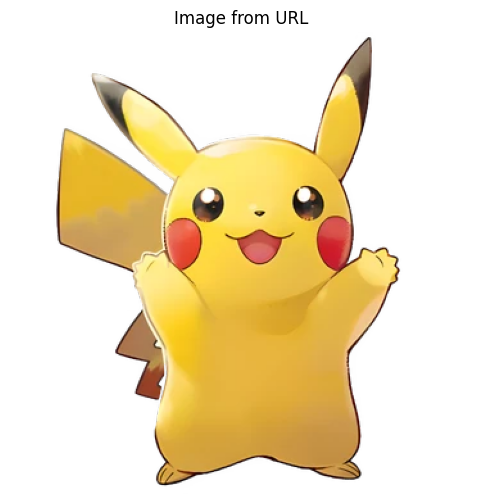

In [24]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

url = 'https://github.com/iceaiai/CS-team/blob/fc0683819e7023983addfd53b3f80cbe54a50b0d/tutorial/image.png?raw=true'

response = requests.get(url)
pikachu_img = Image.open(BytesIO(response.content))

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(pikachu_img)
plt.axis('off')  # Hide axes
plt.title('Image from URL')
plt.show()


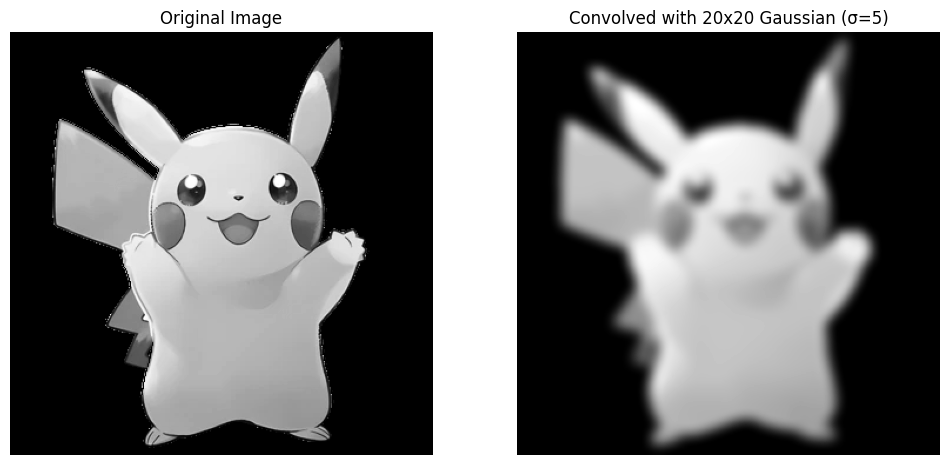

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image (assuming pikachu_img is loaded earlier)
image = pikachu_img.convert('L')  # Convert to grayscale
image_np = np.array(image)

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

# Manually specify the kernel size and sigma for convolution
size = 20  # e.g., 5x5 kernel
sigma = 5  # e.g., sigma of 2

# Generate the Gaussian kernel
kernel = gaussian_kernel(size, sigma)

# Convolve the image with the kernel
convolved_image = convolve(image_np, kernel)

# Plot the original and convolved images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Convolved image
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title(f"Convolved with {size}x{size} Gaussian (σ={sigma})")
plt.axis('off')

plt.show()


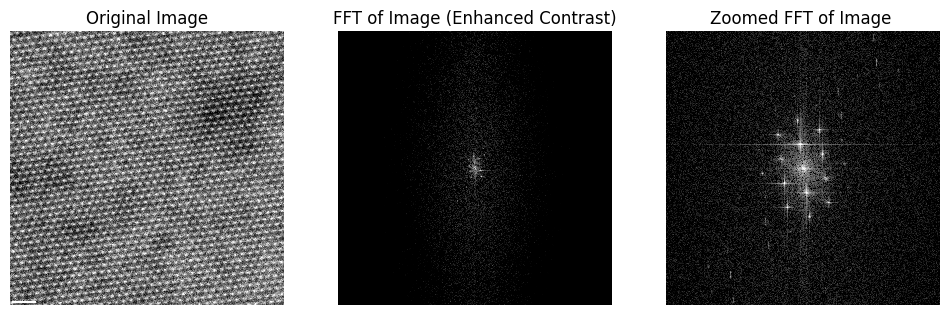

In [83]:
# Load the uploaded image again (to use the new image if needed)

url = 'https://github.com/iceaiai/CS-team/blob/1abeea52be1596b4f252b437935f694de36d567a/2D%20materials/2-10M-LAADF-AFTER%20DRIFTING%20CORRECTION-Average%20Image.png?raw=true'

response = requests.get(url)
image = Image.open(BytesIO(response.content))
image_np = np.array(image)
# Perform FFT
fft_image = np.fft.fft2(image_np)
fft_image_shifted = np.fft.fftshift(fft_image)  # Shift zero frequency to center
fft_magnitude = np.abs(fft_image_shifted)       # Magnitude of the FFT

log_image = np.log(fft_magnitude + 1)
# Adjust contrast: stretch the FFT magnitude to improve visibility
vmin = 0.56 * np.max(log_image)  # Scale to emphasize lower values
vmax = 0.8 * np.max(log_image)        # Keep max value

# Plot the original image and its FFT (with contrast adjustment)
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray', interpolation='none')
plt.title("Original Image")
plt.axis('off')

# FFT Magnitude (Enhanced contrast)
plt.subplot(1, 3, 2)
plt.imshow(log_image, cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')  # Enhanced contrast
plt.title("FFT of Image (Enhanced Contrast)")
plt.axis('off')

dim_x,dim_y = log_image.shape
plt.subplot(1, 3, 3)
plt.imshow(log_image[int(dim_x/8*3):int(dim_x/8*5),int(dim_y/8*3):int(dim_y/8*5)], cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')  # Enhanced contrast
plt.title("Zoomed FFT of Image ")
plt.axis('off')

plt.show()


In [94]:
from numpy.fft import ifftshift
dim_x, dim_y = fft_magnitude.shape
crop_x_start, crop_x_end = int(dim_x / 8 * 3), int(dim_x / 8 * 5)
crop_y_start, crop_y_end = int(dim_y / 8 * 3), int(dim_y / 8 * 5)
def apply_circle_mask(radius):
    # Create a circular mask
    rows, cols = image_np.shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = (x - center_col)**2 + (y - center_row)**2 <= radius**2

    # Apply the mask to the entire shifted FFT
    masked_fft = fft_image_shifted * mask

    # Inverse FFT on the masked FFT
    masked_fft_unshifted = ifftshift(masked_fft)  # Shift the frequencies back
    inverse_image = np.fft.ifft2(masked_fft_unshifted).real  # Perform inverse FFT

    # Plot the cropped FFT and the reconstructed image
    plt.figure(figsize=(12, 6))

    # Cropped FFT with circular mask
    plt.subplot(1, 3, 1)
    cropped_fft = np.log(np.abs(masked_fft) + 1)[crop_x_start:crop_x_end, crop_y_start:crop_y_end]  # Crop FFT for display
    plt.imshow(cropped_fft, cmap='gray', interpolation='none')
    plt.title(f"Cropped FFT (Radius = {radius})")
    plt.axis('off')

    # Reconstructed image from inverse FFT
    plt.subplot(1, 3, 2)
    plt.imshow(inverse_image, cmap='gray', interpolation='none')
    plt.title("Reconstructed Image from Inverse FFT")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(image_np, cmap='gray', interpolation='none')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

# Create an interactive widget for radius adjustment
radius_slider = widgets.IntSlider(value=90, min=1, max=image_np.shape[0]//4, step=1, description='Radius')

# Display the widget and the plot
interactive_plot = widgets.interactive(apply_circle_mask, radius=radius_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=90, description='Radius', max=485, min=1), Output()), _dom_classes=('wid…